In [1]:
import os
import random
import shutil

data_dir = "D:/labSem6/Obrazy1"
clean_data_dir = os.path.join(data_dir, "ObrazyCzyste")
noisy_data_dir = os.path.join(data_dir, "ObrazySzum")

base_dir = os.path.join(data_dir, "Obrazy")
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
validation_dir = os.path.join(base_dir, "validation")

# Создание директорий для train, test и validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Подсчет количества изображений для каждой части (train, test, validation)
num_images = len(os.listdir(clean_data_dir))
num_train = int(0.7 * num_images)
num_test = int(0.15 * num_images)
num_validation = num_images - num_train - num_test

# Получение случайного списка индексов изображений
image_indices = list(range(num_images))
random.shuffle(image_indices)

# Размещение изображений в соответствующих директориях
for i, idx in enumerate(image_indices):
    image_file = os.listdir(clean_data_dir)[idx]
    clean_image_path = os.path.join(clean_data_dir, image_file)
    noisy_image_path = os.path.join(noisy_data_dir, image_file)

    if i < num_train:
        destination_dir = os.path.join(train_dir, "czyste")
        destination_clean_path = os.path.join(destination_dir, image_file)
        destination_noisy_dir = os.path.join(train_dir, "zaszumione")
        destination_noisy_path = os.path.join(destination_noisy_dir, image_file)
    elif i < num_train + num_test:
        destination_dir = os.path.join(test_dir, "czyste")
        destination_clean_path = os.path.join(destination_dir, image_file)
        destination_noisy_dir = os.path.join(test_dir, "zaszumione")
        destination_noisy_path = os.path.join(destination_noisy_dir, image_file)
    else:
        destination_dir = os.path.join(validation_dir, "czyste")
        destination_clean_path = os.path.join(destination_dir, image_file)
        destination_noisy_dir = os.path.join(validation_dir, "zaszumione")
        destination_noisy_path = os.path.join(destination_noisy_dir, image_file)

    os.makedirs(destination_dir, exist_ok=True)
    os.makedirs(destination_noisy_dir, exist_ok=True)

    shutil.copy(clean_image_path, destination_clean_path)
    shutil.copy(noisy_image_path, destination_noisy_path)


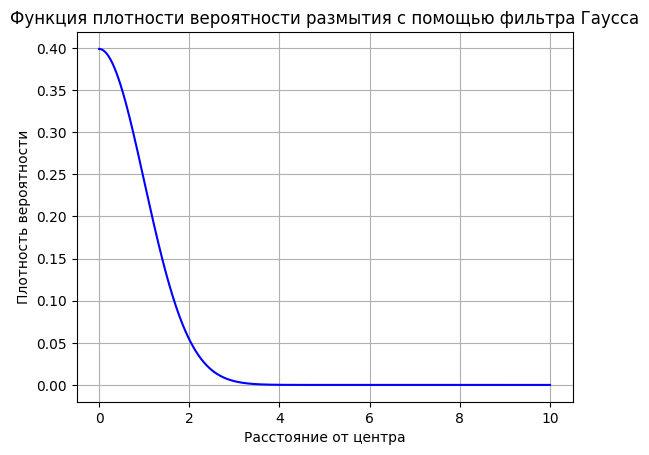

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_blur_pdf(x, sigma):
    return np.exp(-0.5 * (x / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

x = np.linspace(0, 10, 1000)  # Расширяем диапазон оси x до положительных значений
sigma = 1.0  # Параметр сглаживания (ширина размытия)

pdf = gaussian_blur_pdf(x, sigma)

plt.plot(x, pdf, color='blue')
plt.title('Функция плотности вероятности размытия с помощью фильтра Гаусса')
plt.xlabel('Расстояние от центра')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()


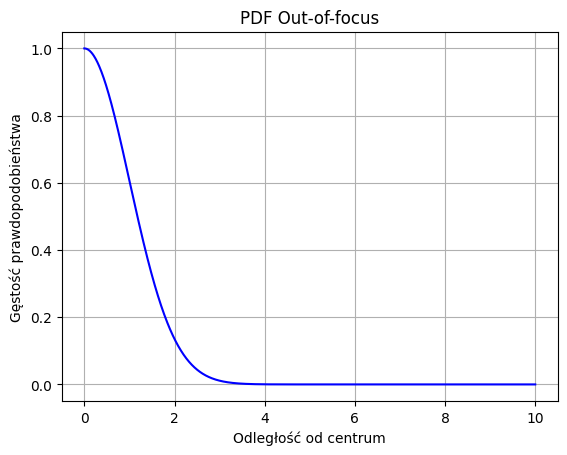

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def out_of_focus_pdf(x, sigma):
    return np.exp(-0.5 * (x / sigma)**2)

x = np.linspace(0, 10, 1000)  # Расширяем диапазон оси x до положительных значений
sigma = 1.0  # Параметр сглаживания (ширина размытия)

pdf = out_of_focus_pdf(x, sigma)

plt.plot(x, pdf, color='blue')
plt.title('PDF Out-of-focus')
plt.xlabel('Odległość od centrum')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.grid(True)
plt.show()



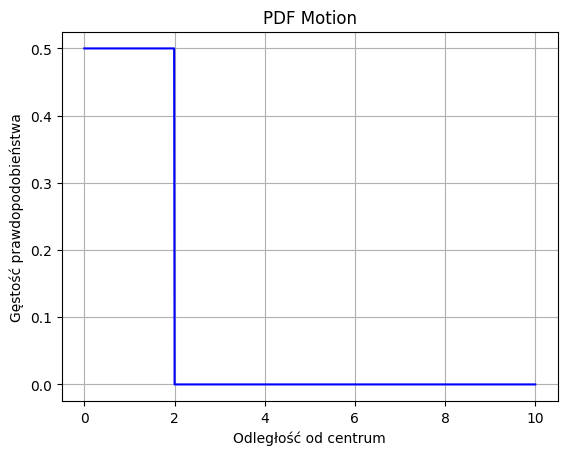

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def motion_blur_pdf(x, length):
    return np.where((x >= 0) & (x <= length), 1 / length, 0)

x = np.linspace(0, 10, 1000)  # Расширяем диапазон оси x до положительных значений
length = 2  # Длина размытия

pdf = motion_blur_pdf(x, length)

plt.plot(x, pdf, color='blue')
plt.title('PDF Motion')
plt.xlabel('Odległość od centrum')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.grid(True)
plt.show()
